# Experiments with TTree

In [1]:
import ROOT
from array import array
from random import random

Welcome to JupyROOT 6.18/04


In [2]:
canvas = ROOT.TCanvas()

In [3]:
file = ROOT.TFile('test1tree.root', 'recreate')

In [4]:
mytree = ROOT.TTree('mytree', 'first test tree')

In [5]:
myfunc = ROOT.TF1("myfunc", "[0]*sin([1]*x)", 0, 10)

In [6]:
myfunc.SetParameter(0, 5)
myfunc.SetParameter(1, 1)

In [7]:
myfunc.GetParameter(0)

5.0

In [8]:
x = myfunc(3.14/2)
x

4.999998414659173

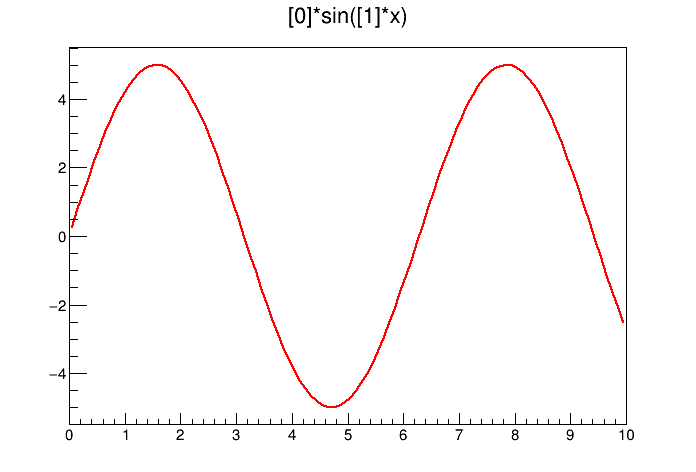

In [9]:
myfunc.Draw() 
canvas.Draw()

In [10]:
myhist = ROOT.TH1D("myhist", "Example histogram", 40, -4, 4)

In [11]:
for i in range(0,10001):
    myhist.Fill(ROOT.gRandom.Gaus(0,1))

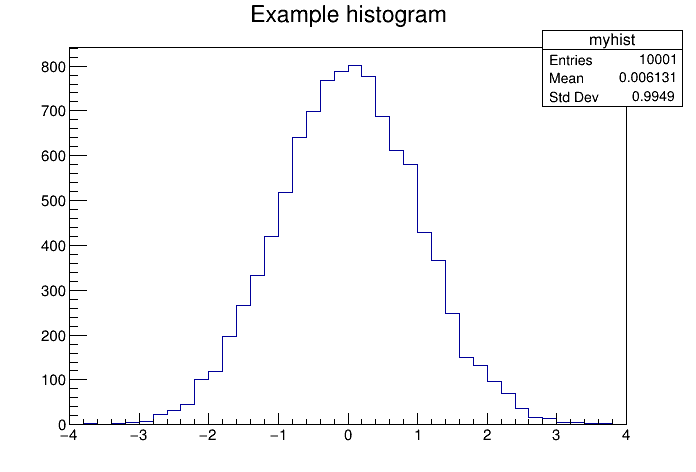

In [12]:
myhist.Draw()
canvas.Draw()

In [13]:
myhist.Write("Example Histogram")

799

In [14]:
myhist2 = file.FindObject("myhist")

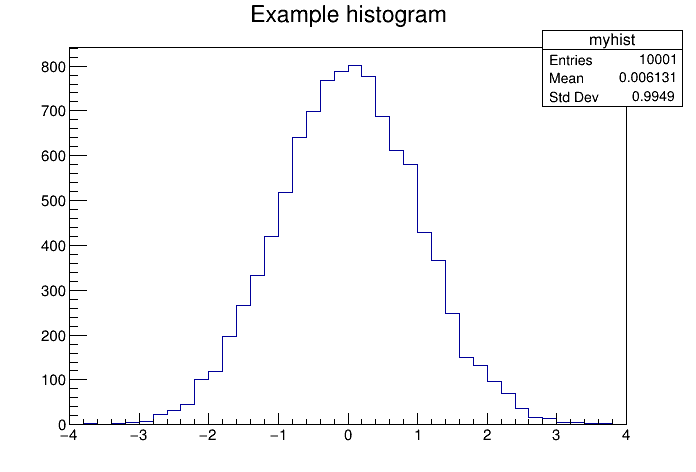

In [15]:
myhist2.Draw()
canvas.Draw()

## TTree & TBranch

[About TTree and how to work with it](https://root.cern.ch/doc/master/classTTree.html)

TTree is a list of independent _columns_ - __branches__. 

(C++ definition): 

`auto branch = tree.Branch(branchname, address, leaflist, bufsize)`

- address is the address of the first item of a structure
- leaflist is the concatenation of all the variable names and types separated by a colon character : The variable name and the variable type are separated by a slash/ ("myVar/I")

[How to Write a TTree in Python](https://root.cern.ch/how/how-write-ttree-python)


## Array 

``` python
from array import array
arrayIdentifierName = array(typecode, [Initializers])
```
Typecodes:

- ‘b’ -> Represents signed integer of size 1 byte
- ‘B’ -> Represents unsigned integer of size 1 byte
- ‘c’ -> Represents character of size 1 byte
- ‘u’ -> Represents unicode character of size 2 bytes
- ‘h’ -> Represents signed integer of size 2 bytes
- ‘H’ -> Represents unsigned integer of size 2 bytes
- ‘i’ -> Represents signed integer of size 2 bytes
- ‘I’ -> Represents unsigned integer of size 2 bytes
- ‘w’ -> Represents unicode character of size 4 bytes
- ‘l’ -> Represents signed integer of size 4 bytes
- ‘L’ -> Represents unsigned integer of size 4 bytes
- ‘f’ -> Represents floating point of size 4 bytes
- ‘d’ -> Represents floating point of size 8 bytes



In [16]:
valtowrite = array('f', [0.0]);
branch1 = mytree.Branch('branch1', valtowrite, 'val1/F');

In [30]:
for i in range(20):
    valtowrite[0] = random()
    mytree.Fill()

In [18]:
dir(branch1)

['AbstractMethod',
 'AddBasket',
 'AddLastBasket',
 'AppendPad',
 'BackFill',
 'Browse',
 'CheckedHash',
 'Class',
 'ClassName',
 'Class_Name',
 'Class_Version',
 'Clear',
 'Clone',
 'Compare',
 'Copy',
 'DeclFileLine',
 'DeclFileName',
 'Delete',
 'DeleteBaskets',
 'Dictionary',
 'DistancetoPrimitive',
 'Draw',
 'DrawClass',
 'DrawClone',
 'DropBaskets',
 'Dump',
 'Error',
 'Execute',
 'ExecuteEvent',
 'ExpandBasketArrays',
 'Fatal',
 'Fill',
 'FillBuffer',
 'FillImpl',
 'FindBranch',
 'FindLeaf',
 'FindObject',
 'FlushBaskets',
 'FlushOneBasket',
 'GetAddress',
 'GetBasket',
 'GetBasketBytes',
 'GetBasketEntry',
 'GetBasketSeek',
 'GetBasketSize',
 'GetBrowsables',
 'GetBulkRead',
 'GetClassName',
 'GetCompressionAlgorithm',
 'GetCompressionLevel',
 'GetCompressionSettings',
 'GetDirectory',
 'GetDrawOption',
 'GetDtorOnly',
 'GetEntries',
 'GetEntry',
 'GetEntryExport',
 'GetEntryNumber',
 'GetEntryOffsetLen',
 'GetEvent',
 'GetExpectedType',
 'GetFile',
 'GetFileName',
 'GetFillCol

In [23]:
branch1.GetListOfLeaves().Print()

Collection name='TObjArray', class='TObjArray', size=16
 OBJ: TLeafF	val1	val1


In [20]:
help(branch1.GetListOfLeaves)

Help on method GetListOfLeaves in module ROOT:

GetListOfLeaves = <ROOT.MethodProxy object>


In [31]:
for ent in mytree:
    print(ent.val1)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
0.7695271372795105
0.8179583549499512
0.43731510639190674
0.5613769292831421
0.7251492142677307
0.7142108082771301
0.9860780835151672
0.6485249996185303
0.47839850187301636
0.490433007478714
0.06876180320978165
0.9559463262557983
0.2456931620836258
0.5419321060180664
0.21435585618019104
0.984001100063324
0.6884587407112122
0.023433411493897438
0.3183155357837677
0.04179875925183296
